In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%run -i ../notebooks/functions/functions.py
%run -i ../notebooks/functions/ML_functions.py

In [4]:
master_df = pd.read_csv('../processed_data/master.csv')
lat_lng = master_df.iloc[:, 0:2]

In [5]:
master_df.describe()

,NTA_lat,NTA_long,Population,traffic,buildings,legalstories,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,40.721129,-73.920450,42288.789744,609.260338,274.717949,2.939207,11.610256,5.707692,6.107692,7.769231
std,0.091022,0.101162,21879.002411,607.221587,465.368137,2.544228,8.741529,6.577194,5.746688,4.738859
min,40.525528,-74.233554,418.000000,29.439815,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.652996,-73.974395,26518.000000,290.000000,70.000000,1.000000,6.000000,2.000000,2.000000,4.000000
50%,40.718338,-73.916821,36891.000000,343.050926,70.000000,2.417840,10.000000,4.000000,4.000000,7.000000
75%,40.789101,-73.855079,53896.000000,670.030671,152.500000,3.464321,15.500000,6.000000,9.000000,11.000000
max,40.899535,-73.711025,132378.000000,3993.351852,2946.000000,26.875000,68.000000,59.000000,31.000000,21.000000


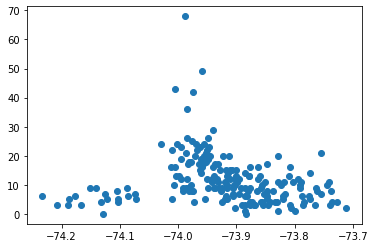

In [15]:
fig, axes = plt.subplots()

axes.scatter(master_df.NTA_long, master_df['DAY CARE'])

In [14]:
outliers = master_df.loc[master_df['DAY CARE'] > 40]
outliers

,NTA_lat,NTA_long,Population,traffic,buildings,legalstories,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
18,40.790380,-73.973908,120000.0,834.694444,1442.0,6.138194,42.0,24.0,9.0,16.0
44,40.703917,-73.958597,32926.0,325.189815,110.0,4.109091,49.0,35.0,17.0,6.0
129,40.630950,-73.988661,106357.0,208.497685,149.0,2.865772,68.0,35.0,11.0,6.0
150,40.641889,-74.004646,72340.0,290.000000,72.0,2.805556,43.0,16.0,12.0,14.0


In [8]:
outliers_zip = lat_long_zip(outliers)
NTA_zip = lat_long_zip(lat_lng)

<AxesSubplot:>

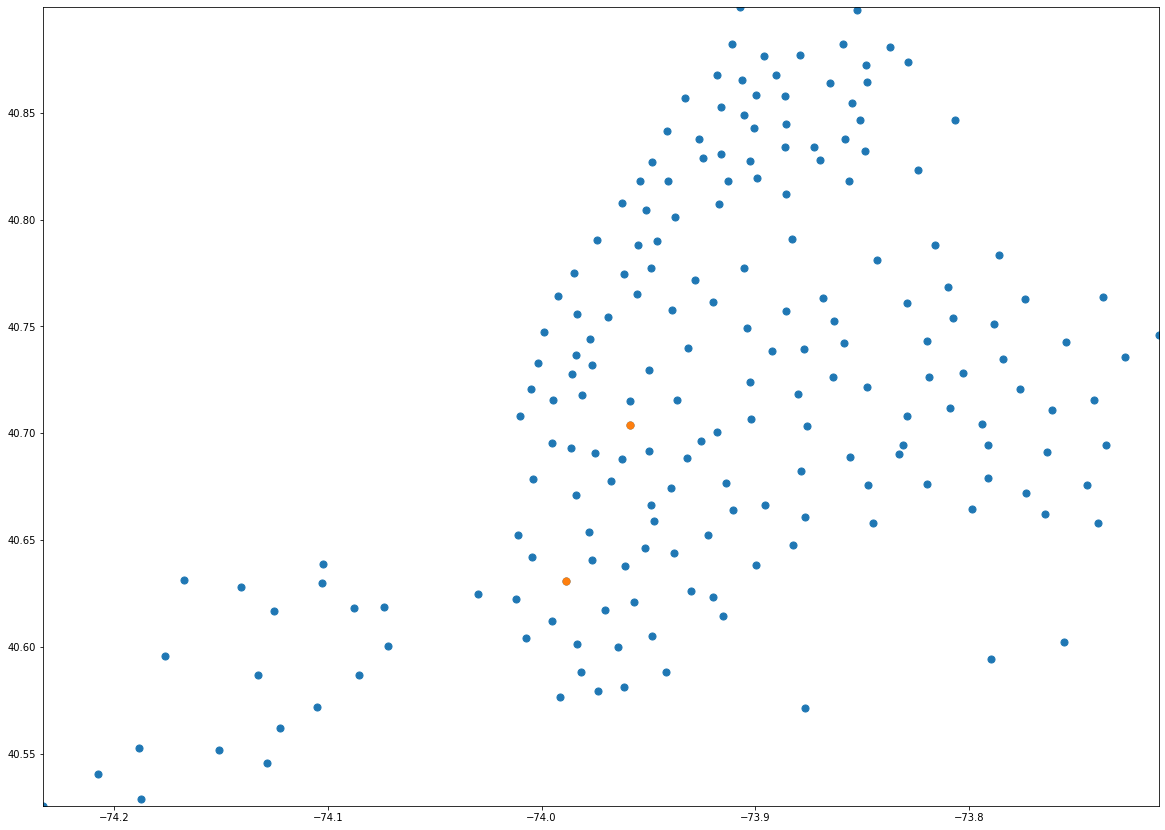

In [9]:
fig,ax=plt.subplots(figsize=(20,20))

ax.set_xlim(min(lat_lng['NTA_long']), max(lat_lng['NTA_long']))
ax.set_ylim(min(lat_lng['NTA_lat']), max(lat_lng['NTA_lat']))
#loop through each cluster
NTA_zip.plot(ax = ax, markersize = 50, marker = 'o', label = 'NTA')
outliers_zip.plot(ax = ax, markersize = 50, marker = 'o', label = 'outliers')

In [16]:
#eliminating outliers
master_df.loc[master_df['legalstories'] > 25, 'legalstories'] = 10
master_df.loc[master_df['traffic'] > 3000, 'traffic'] = 2500
master_df.loc[master_df['Population'] > 120000, 'Population'] = 120000
master_df.loc[master_df['DAY CARE'] > 60, 'DAY CARE'] = 45
master_df.loc[master_df['NON-PUBLIC K-12 SCHOOLS'] > 40, 'NON-PUBLIC K-12 SCHOOLS'] = 35
master_df.loc[master_df['HOSPITALS AND CLINICS'] > 30, 'HOSPITALS AND CLINICS'] = 25

In [17]:
master_df.describe()

,NTA_lat,NTA_long,Population,traffic,buildings,legalstories,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,40.721129,-73.920450,42225.312821,595.107512,274.717949,2.852669,11.492308,5.528205,6.076923,7.769231
std,0.091022,0.101162,21632.853201,543.101634,465.368137,1.941481,8.109031,5.391189,5.627549,4.738859
min,40.525528,-74.233554,418.000000,29.439815,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.652996,-73.974395,26518.000000,290.000000,70.000000,1.000000,6.000000,2.000000,2.000000,4.000000
50%,40.718338,-73.916821,36891.000000,343.050926,70.000000,2.417840,10.000000,4.000000,4.000000,7.000000
75%,40.789101,-73.855079,53896.000000,670.030671,152.500000,3.464321,15.500000,6.000000,9.000000,11.000000
max,40.899535,-73.711025,120000.000000,2500.000000,2946.000000,11.896396,49.000000,35.000000,25.000000,21.000000


In [18]:
#save to csv
master_df.to_csv('../processed_data/master.csv', index=False, encoding='utf-8')